## Download data using a URL

In [72]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [73]:
import requests
import shutil

# URL của tệp ZIP
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

# Tên tệp ZIP sẽ được lưu trên máy tính
local_filename = 'bank-additional.zip'

# Gửi yêu cầu GET để tải tệp ZIP
with requests.get(url, stream=True) as r:
    r.raise_for_status()  # Kiểm tra xem yêu cầu có thành công không
    with open(local_filename, 'wb') as f:
        shutil.copyfileobj(r.raw, f)  # Lưu nội dung tệp ZIP vào máy tính

print(f'Tệp ZIP đã được tải về và lưu tại: {local_filename}')


Tệp ZIP đã được tải về và lưu tại: bank-additional.zip


# Unzip

In [74]:
import zipfile
import os

# Đảm bảo rằng file ZIP tồn tại
zip_file = 'bank-additional.zip'
destination_folder = 'path/to/destination/folder'

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print("Unzipping completed.")


Unzipping completed.


# Import Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)
import warnings
warnings.filterwarnings("ignore")
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)

Further specify the value of the `precision` parameter equal to 2 to display two decimal signs (instead of 6 as default).


In [76]:
pd.options.display.float_format = "{:.2f}".format 

## Load the Dataset

In [77]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep = ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


The target feature shows a positive behavior of a phone call during the marketing campaign. Mark the positive outcome as 1 and negative one as 0.Use the `map` function for **replacement the values ​​in column** by passing it as an argument dictionary in form of `{old_value: new_value} `



In [78]:
d = {"yes": 1, "no":0}
df["y"] = df["y"].map(d)

### Attribute Information


 Output the column (feature) names:

In [79]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


Input features (column names):<br>
age - client age in years (numeric) <br>
job - type of job (categorical: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)<br>
marital - marital status (categorical: divorced, married, single, unknown)<br>
education - client education (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)
default - has credit in default? (categorical: no, yes, unknown)<br>
housing - has housing loan? (categorical: no, yes, unknown)<br>
loan - has personal loan? (categorical: no, yes, unknown)<br>
contact - contact communication type (categorical: cellular, telephone)<br>
month - last contact month of the year (categorical: jan, feb, mar, ..., nov, dec)<br>
day_of_week - last contact day of the week (categorical: mon, tue, wed, thu, fri)<br>
duration - last contact duration, in seconds (numeric).<br>
campaign - number of contacts performed for this client during this campaign (numeric, includes last contact)<br>
pdays - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted)<br>
previous - number of contacts performed for this client before this campaign (numeric)<br>
poutcome - outcome of the previous marketing campaign (categorical: failure, nonexistent, success)<br>
emp.var.rate - employment variation rate, quarterly indicator (numeric)<br>
cons.price.idx - consumer price index, monthly indicator (numeric)<br>
cons.conf.idx - consumer confidence index, monthly indicator (numeric)<br>
euribor3m - euribor 3 month rate, daily indicator (numeric)<br>
nr.employed - number of employees, quarterly indicator (numeric)<br>
Output feature (desired target):<br>

y - has the client subscribed a term deposit? (binary: yes,no)


Let's look at the dataset size.


In [80]:
df.shape

(41188, 21)

The dataset contains 41188 objects (rows), for each of which 21 features are set (columns), including 1 target feature (y).


# Python libraries for visual data analysis

### Matplotlib


For each feature, you can build a separate histogram with `hist` function:


<Axes: >

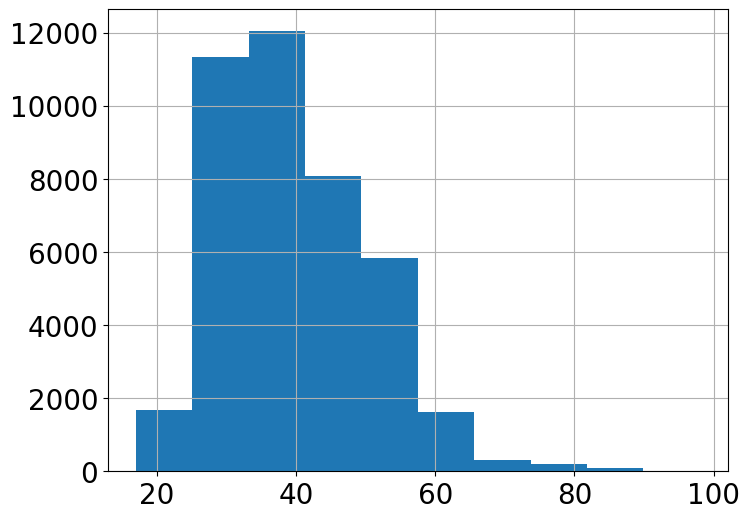

In [81]:
df["age"].hist()

The histogram shows that most of our clients are between the ages of 25 and 50, which corresponds to the actively working part of the population.

Build a graph of the average client age depending on the marital status

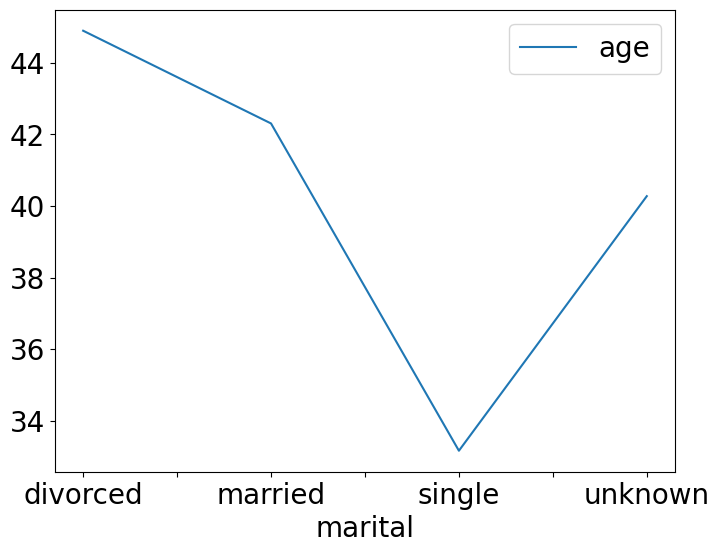

In [82]:
df[["age","marital"]].groupby("marital").mean().plot();

The plot shows that the average age of unmarried clients is significantly lower than that of the other clients.


With the kind parameter you can change the plot type, for example, to a bar chart. MATPLOTLIB allows you to configure graphics very flexibly. 
For example, the rot parameter is responsible for the angle of tilt signatures to the x axis.

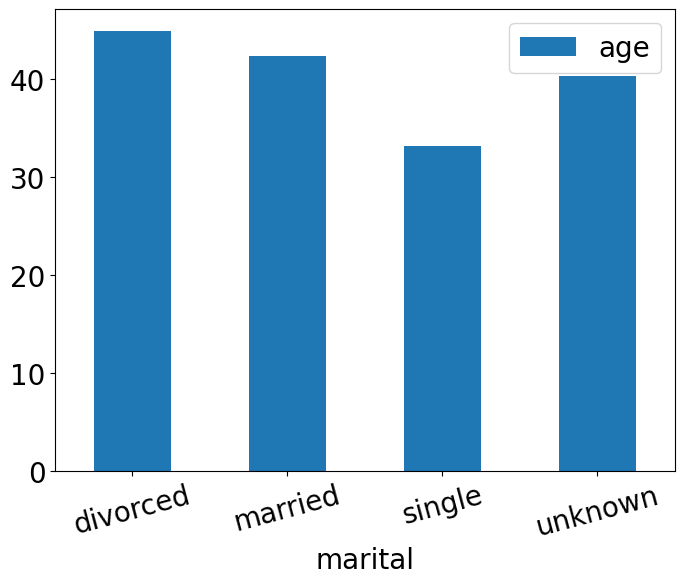

In [83]:
df[["age","marital"]].groupby("marital").mean().plot(kind = "bar", rot = 15);

### Seaborn


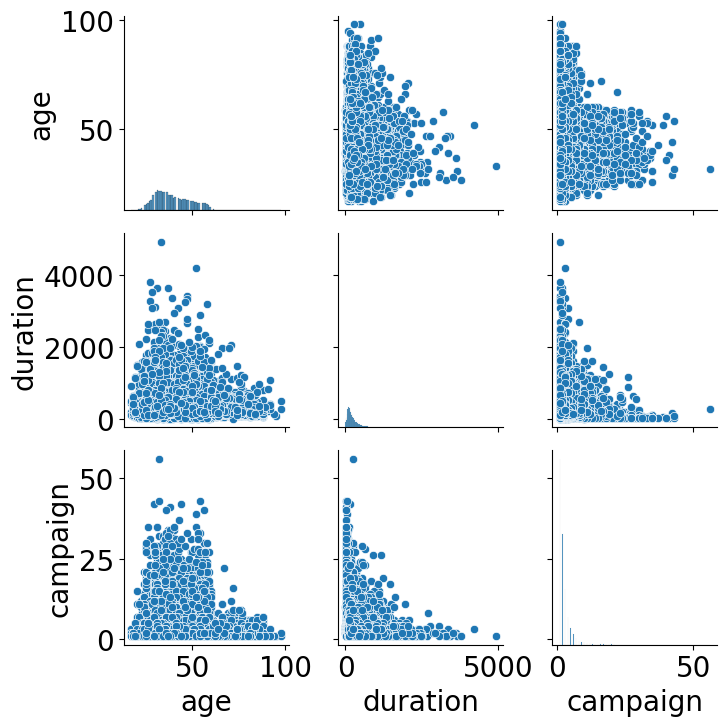

In [84]:
sns.pairplot(df[["age", "duration", "campaign"]]);

Look at the distribution of the client age. To do this, build distplot:

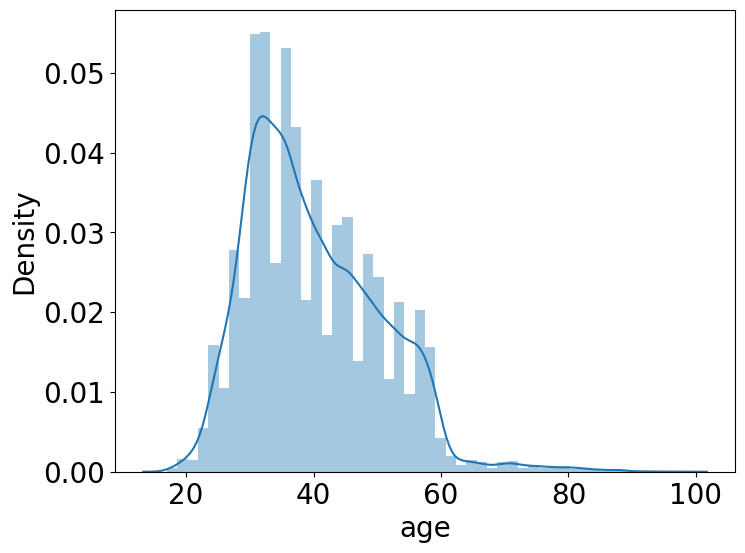

In [85]:
sns.distplot(df.age);

In order to look more for the relationship between two numerical features, there is also `joint_plot` - this is a hybrid Scatter Plot and Histogram (there are also histograms of feature distributions). Let's look at the relationship between the number of contacts in a campaign and the last contact duration.

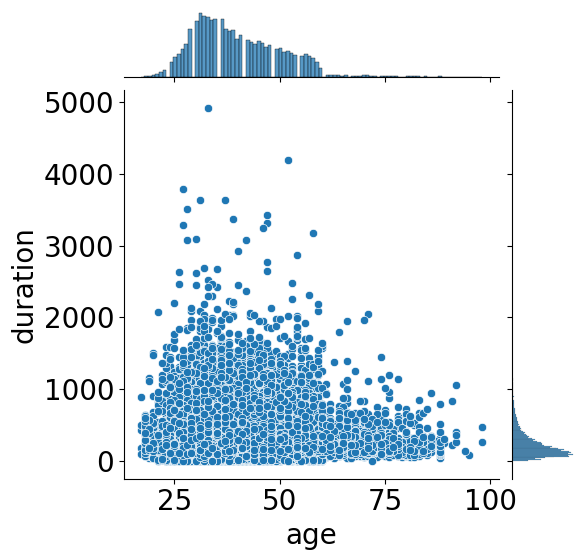

In [86]:
sns.jointplot(x="age", y="duration", data=df, kind="scatter")

Another useful seaborn plot type is Box Plot ("Box and whisker plot"). Let's compare the age of customers for the top 5 of the most common employment forms.

<Axes: xlabel='age', ylabel='job'>

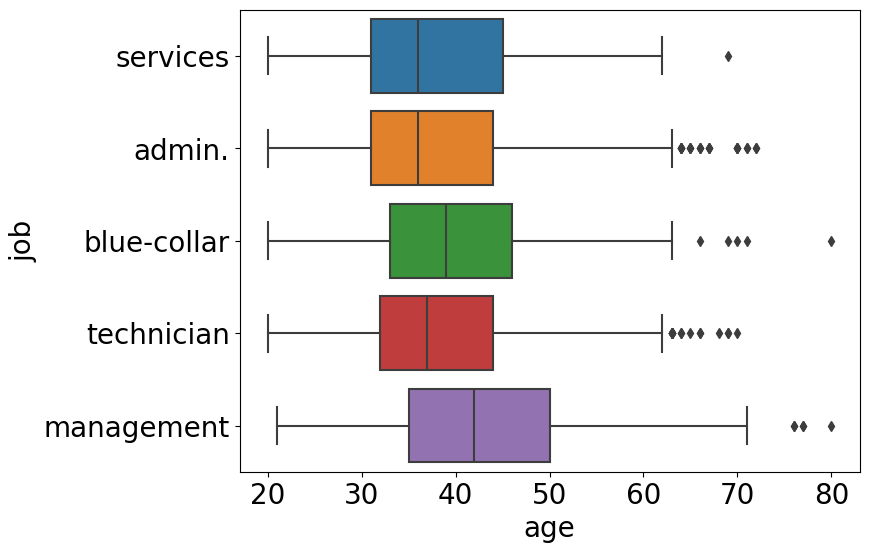

In [87]:
top_jobs = (
    df.job.value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="job", x="age", data=df[df.job.isin(top_jobs)], orient="h"
)

The plot shows that among the top-5 client categories by the type of employment, the most senior customers represent the management, and the largest number of outliers is among the categories of admin. and technician.


And one more plot type is a heat map. A Heat Map allows you to look at the distribution of some numerical feature in two categories. We visualize the distribution of clients on family status and the type of employment.

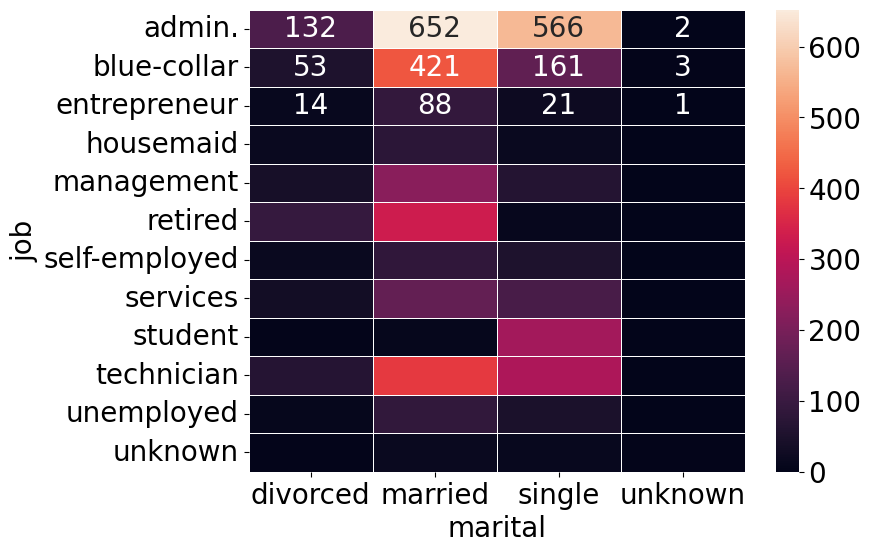

In [88]:
job_marital_y = (
    df.pivot_table(
        index="job", columns="marital", values="y", aggfunc=sum
    )
)
sns.heatmap(job_marital_y, annot=True, fmt="d", linewidths=0.5);

The plot shows that the largest number of attracted clients among administrative workers is married (652), and there is the smallest number of attracted clients among customers with an unknown family status.

### Plotly


we build Line Plot with the distribution of the total number and the number of attracted clients by age.<br>
The beauty of interactive graphs is that you can see the exact numerical value on mouse hover, hide the uninteresting rows in the visualization, zoom in a certain area of ​​graphics, etc.

In [89]:
age_df = (
    df.groupby("age")[["y"]]
    .sum()
    .join(df.groupby("age")[["y"]].count(), rsuffix='_count')
)
age_df.columns = ["Attracted", "Total Number"]

In `Plotly`, we create the `Figure` object, which consists of data (list of lines that are called `traces`) and design/style, for which the object `Layout` was created. In simple cases, you can call the function `iplot` just for the `traces` list.

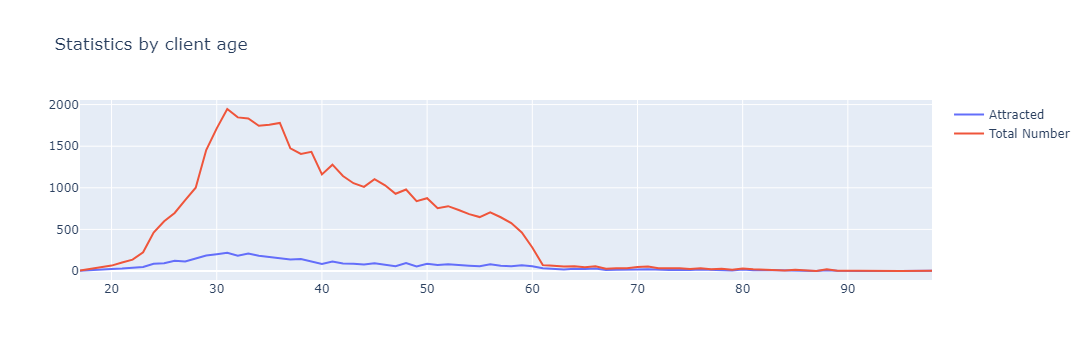

In [90]:
trace0 = go.Scatter(x=age_df.index, y=age_df["Attracted"], name="Attracted")
trace1 = go.Scatter(x=age_df.index, y=age_df["Total Number"], name="Total Number")

data = [trace0, trace1]
layout = {"title": "Statistics by client age"}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

Let us also see the distribution of customers by months, designed by the number of attracted clients and on the total number of clients. To do this, build __Bar Chart__.

In [91]:
month_index = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
month_df = (
    df.groupby("month")[["y"]]
    .sum()
    .join(df.groupby("month")[["y"]].count(), rsuffix='_count')
).reindex(month_index)
month_df.columns = ["Attracted", "Total Number"]

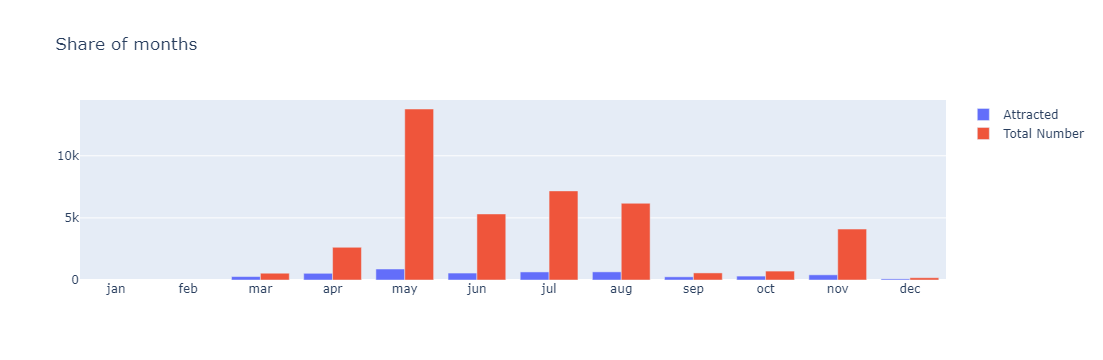

In [92]:
trace0 = go.Bar(x=month_df.index, y=month_df["Attracted"], name="Attracted")
trace1 = go.Bar(x=month_df.index, y=month_df["Total Number"], name="Total Number")

data = [trace0, trace1]
layout = {"title": "Share of months"}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

`plotly` can build the __Box plot__. Consider the differences in the client age depending on the family status.


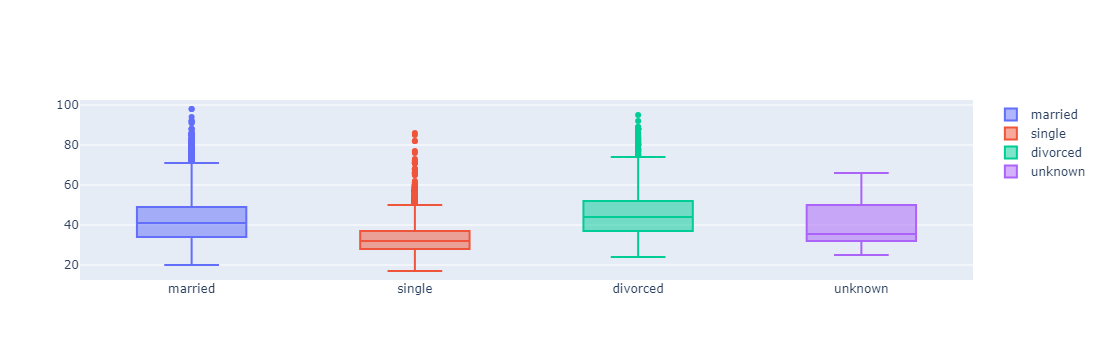

In [93]:
data = []

for status in df.marital.unique():
    data.append(go.Box(y=df[df.marital == status].age, name=status))
iplot(data, show_link=False)

The plot clearly shows the distribution of clients by age, the presence of outliers for all categories of the family status, except for `unknown`. Moreover, the plot is interactive - hovering the mouse pointer to its elements allows you to obtain additional statistical characteristics of the series. Discover the characteristics.

## Visual analysis of single features


the most commonly used plot types to analyze single features of data sets.


#### Numerical features


For the analysis of numerical features, a histogram and a box plot are most often used.


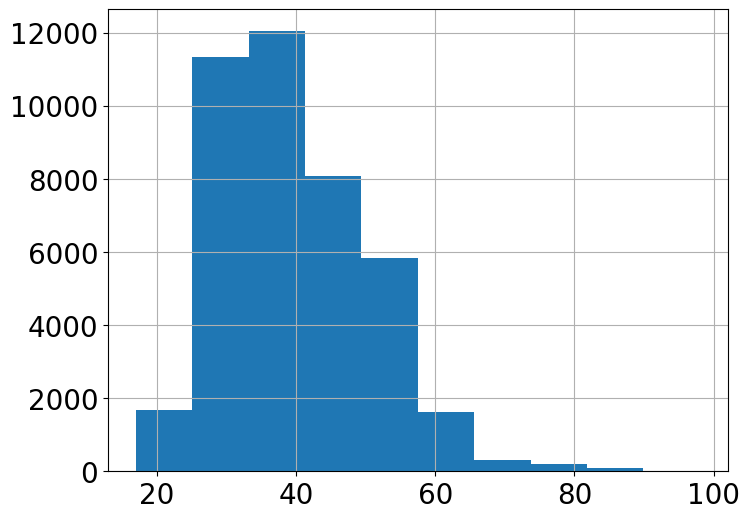

In [94]:
df["age"].hist();

Build a box plot for the `cons.price.idx` feature with `sns.boxplot` function.

<Axes: >

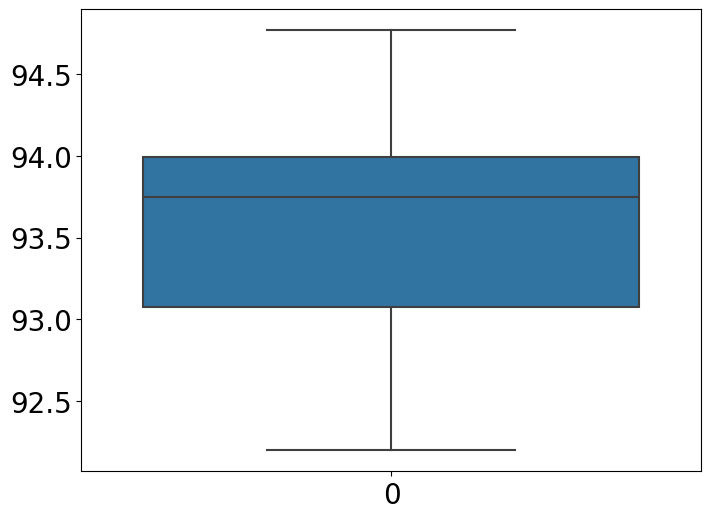

In [95]:
sns.boxplot(df["cons.price.idx"])

### Categorical features


Use the `countplot` graphics for effective analysis of categorical features.
It's effective to use the graphics of the type `CountPlot` for analyzing categorical features.

Calculate the client distribution of marital status.


In [96]:
df["marital"].value_counts().head()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Let's calculate the client distribution on the fact of their involvement for signing a deposit as well.


In [97]:
df["y"].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

Present this information graphically.


<Axes: xlabel='y', ylabel='count'>

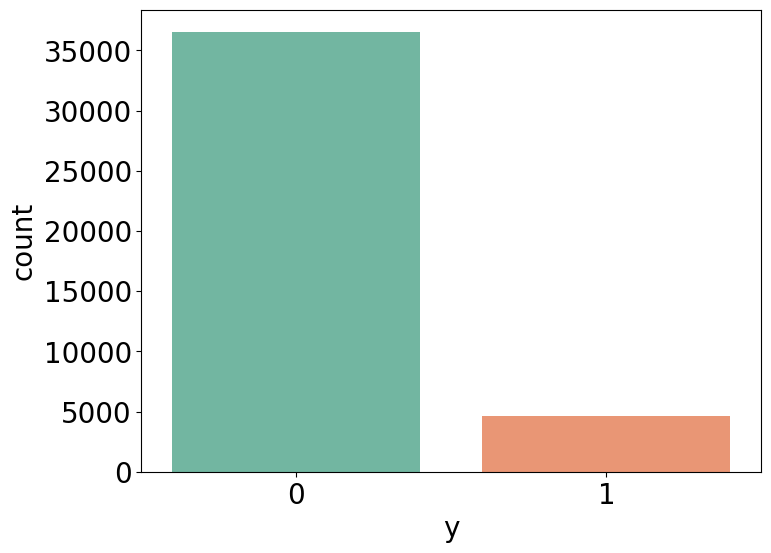

In [98]:
sns.countplot(x="y", data=df, palette="Set2")


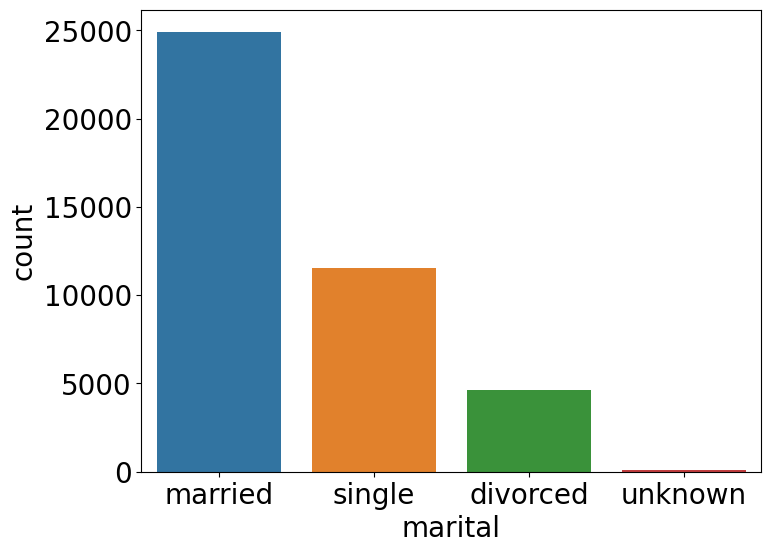

In [99]:
sns.countplot(x="marital", data=df);

Plot the graphical client distribution by the 5 most common types of employment.


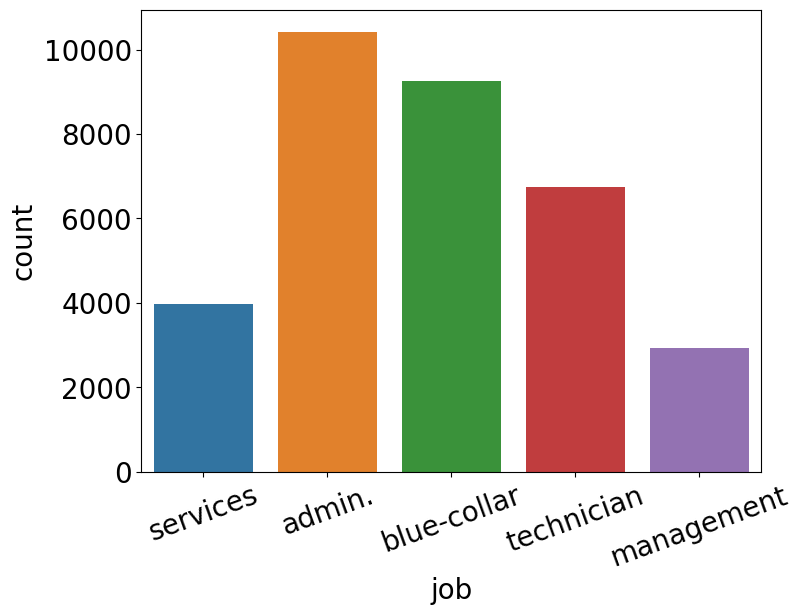

In [100]:
# Lấy 5 giá trị phổ biến nhất trong cột 'job'
# Get the 5 most common values ​​in the 'job' column
top_jobs = df["job"].value_counts().head(5).index

# Tạo countplot cho các giá trị phổ biến nhất
# Create countplot for most common values
plot = sns.countplot(x="job", data=df[df["job"].isin(top_jobs)])

# Xoay nhãn trục x
# Rotate x-axis label
plt.setp(plot.get_xticklabels(), rotation=20)
plt.show()

## Visual analysis of the feature interaction


### Numerical features


To analyze the interaction of numerical features, use `hist` (histogram), `pairplot` and `heatmap` plot functions.


We visualize the values ​​of the economy macro indicators from the dataset.


array([[<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>],
       [<Axes: title={'center': 'euribor3m'}>,
        <Axes: title={'center': 'nr.employed'}>]], dtype=object)

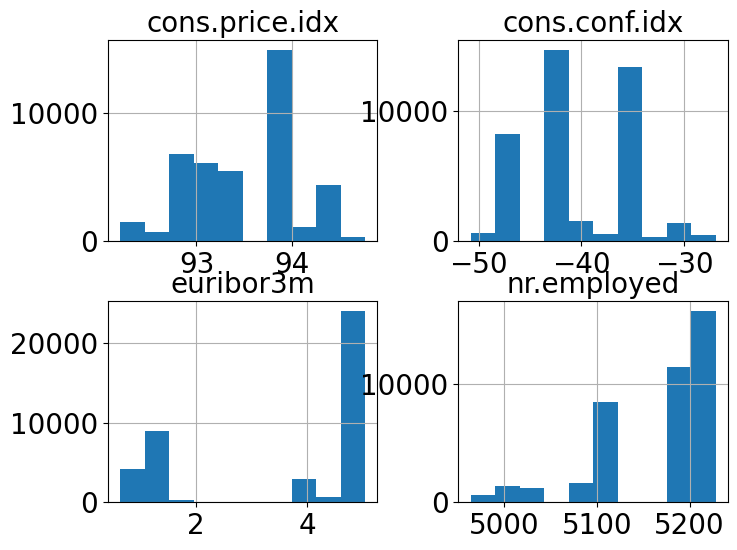

In [101]:
feat = ["cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

df[feat].hist()

Build a pair plot set for the `feat` list with `sns.pairplot` function.


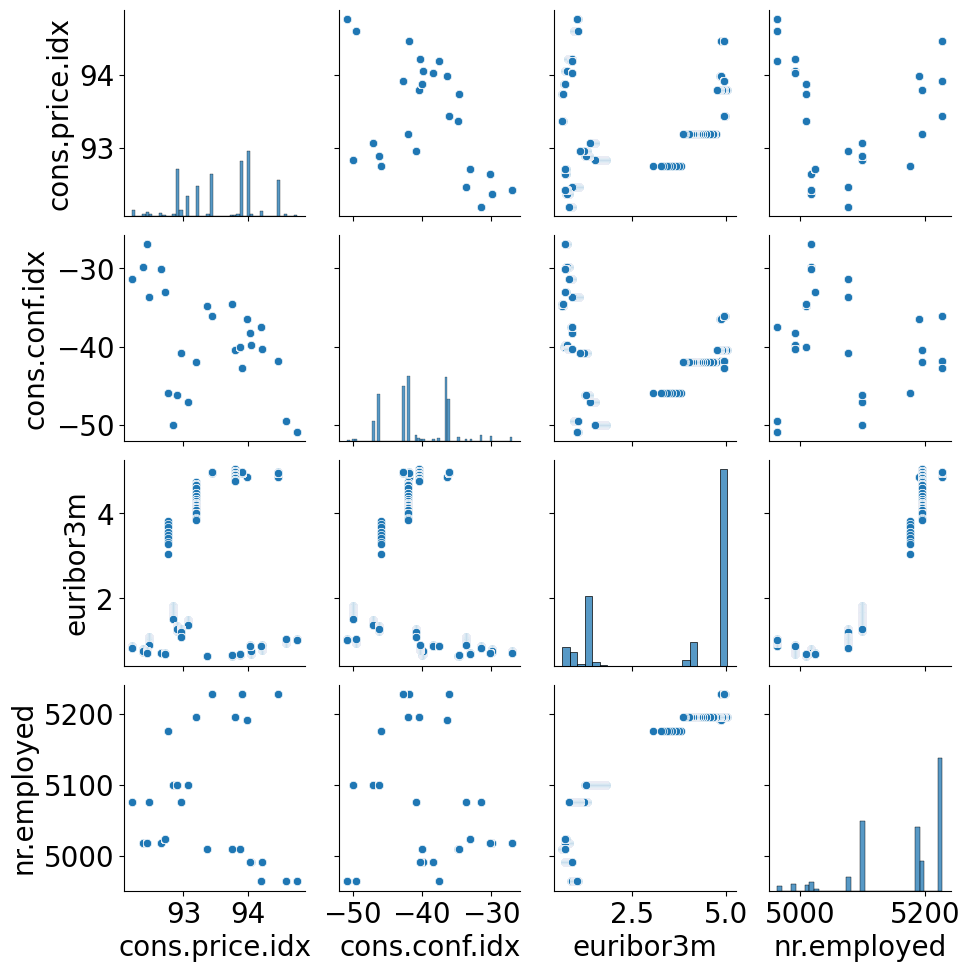

In [102]:
sns.pairplot(df[feat])

Build a Heat Map for the economy macro indicators [correlation matrix]

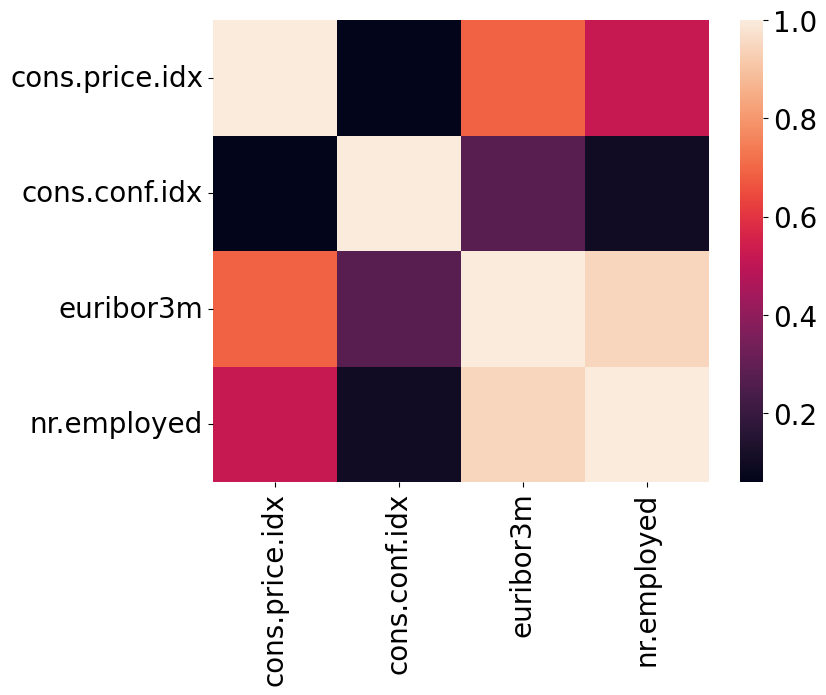

In [153]:
sns.heatmap(df[feat].corr());

We see a strong interaction between the `euribor3m` and `nr.employed` features.


### Numerical and categorical features


`boxplot` and `violinplot` are used for visual analysis of the numerical and categorical features.

Let's look at the `age` feature box plot by the target feature.


<Axes: xlabel='y', ylabel='age'>

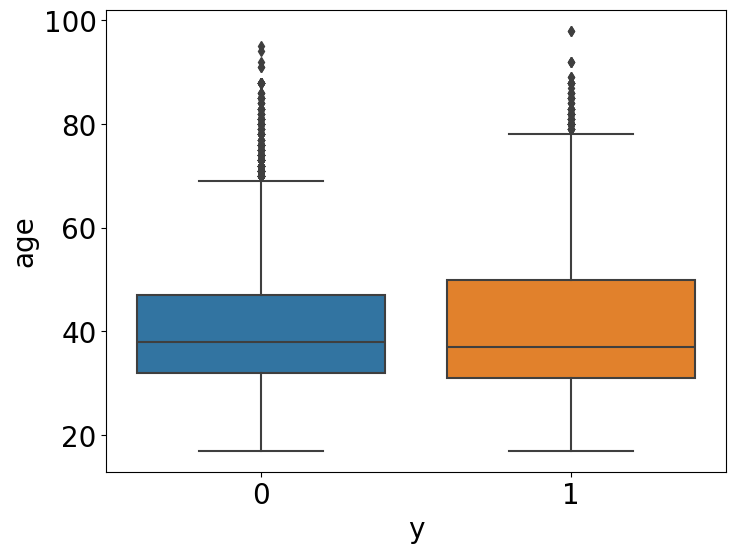

In [104]:
sns.boxplot(x="y", y="age", data=df)

Build the box plot for the `marital` feature with `sns.boxplot` function.


<Axes: xlabel='marital', ylabel='age'>

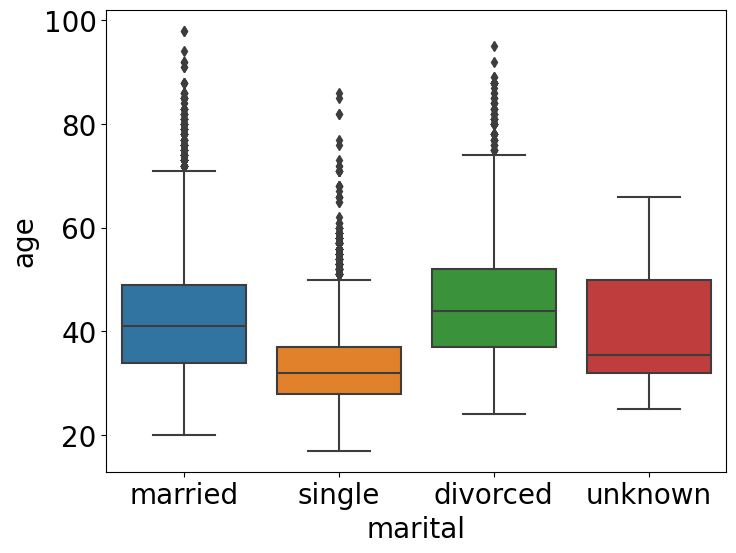

In [105]:
sns.boxplot(x="marital", y="age", data=df)

It is useful to combine grouping with a `boxplot`. Calculate the mean client for the grouping by the `housing` feature values.

In [106]:
df.groupby("housing")["age"].mean()

housing
no        40.04
unknown   39.95
yes       40.01
Name: age, dtype: float64

Build a box plot for the `age` feature by the `housing` values with `sns.boxplot` function.


<Axes: xlabel='housing', ylabel='age'>

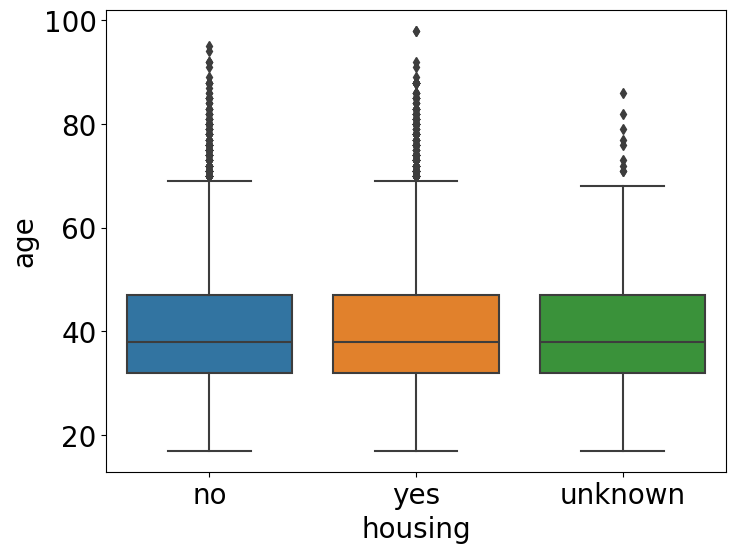

In [107]:
sns.boxplot(x="housing", y="age", data=df)

### Categorical features


Use `countplot` for a visual interaction analysis between categorical features.

Calculate and visualize the interaction between target and client marital status features.


In [108]:
pd.crosstab(df["y"], df["marital"])

marital,divorced,married,single,unknown
y,,,,
0,4136,22396,9948,68
1,476,2532,1620,12


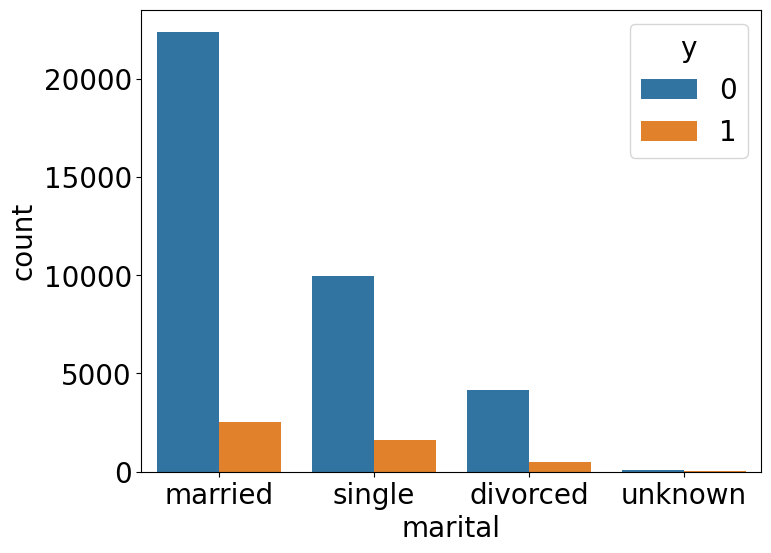

In [114]:


# Vẽ biểu đồ countplot
sns.countplot(x="marital", hue="y", data=df)
plt.show()

Build the count plot for the `month` feature by the `y` feature target values with `sns.countplot` function.


<Axes: xlabel='month', ylabel='count'>

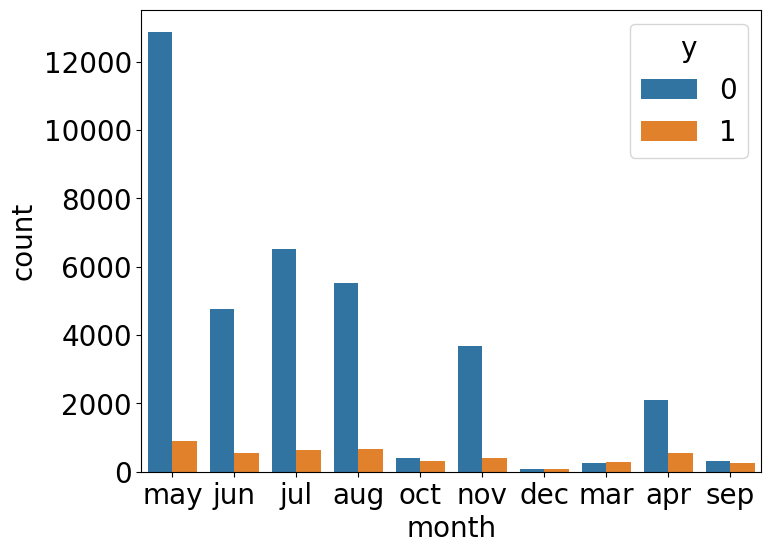

In [115]:
sns.countplot(x="month", hue="y", data=df)

## Comprehensive visual analysis of the source banking dataset


Create the `categorical` and `numerical` lists for the correspondent dataset features.

Let's look at the distribution of numerical features with `hist` function.


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>, <Axes: >, <Axes: >]],
      dtype=object)

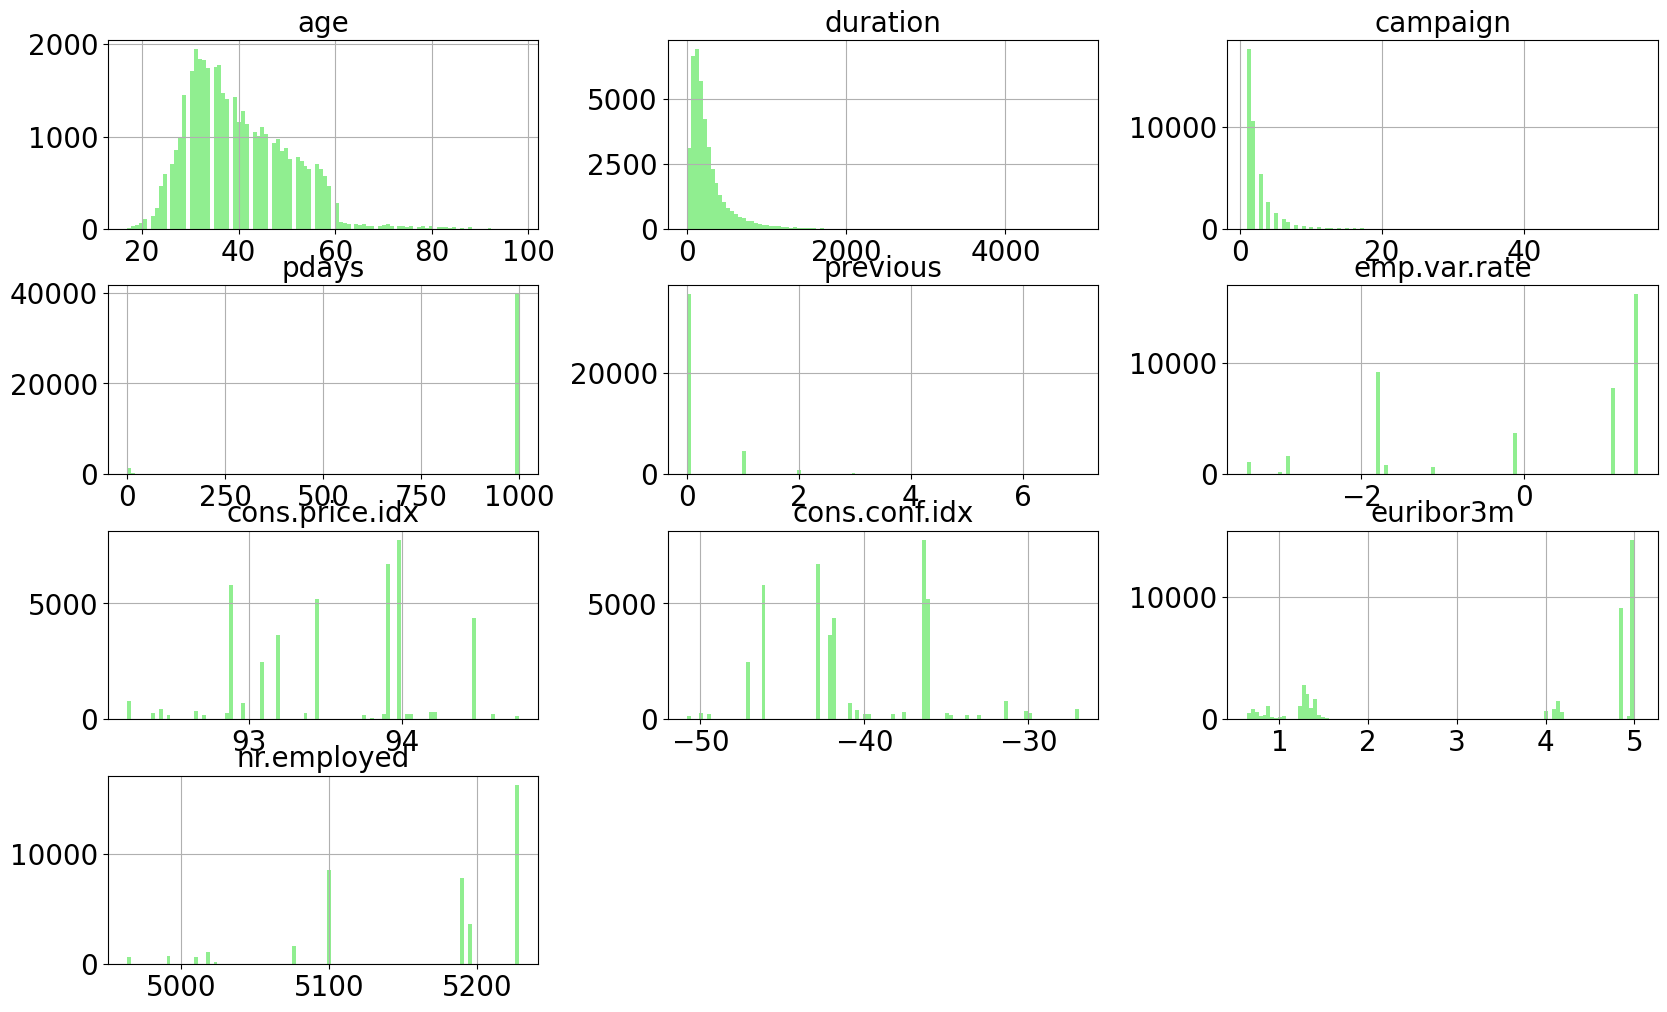

In [116]:
categorical = []
numerical = []
for feature in df.columns:
    if df[feature].dtype == object:
        categorical.append(feature)
    else:
        numerical.append(feature)

df[numerical].hist(figsize=(20,12), bins=100, color='lightgreen')

From the histograms, we see that **for each numerical feature there is one or more dominant segments of values​**, that is why we got pronounced peaks.

In addition, we see that the target feature is unbalanced. **The number of positive outcomes is significantly lower than negative**, which is quite natural for telephone marketing. As a result, the problem arises with the fact that many methods are sensitive to the imbalance of features. We will try to solve this problem later.

Next, let's look at the categorical features.

In [117]:
df.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,0
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Visualize the categorical features with bar plots.


Let's look at the correlation matrix (for the numerical features).


In [140]:
print(df.dtypes)
# Lọc ra các cột số
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Tính toán ma trận tương quan
correlation_table = numeric_df.corr()
print(correlation_table)
"""# Xóa các cột không phải số
df1 = df.select_dtypes(include=['float64', 'int64'])

# Tính toán ma trận tương quan
correlation_table = df1.corr()
print(correlation_table)"""

'''# Mã hóa các cột phân loại
df_encoded = pd.get_dummies(df, drop_first=True)

# Tính toán ma trận tương quan
correlation_table = df_encoded.corr()
print(correlation_table)'''


'''
correlation_table = df.corr()
correlation_table'''

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                 float64
dtype: object
                 age  duration  campaign  pdays  previous  emp.var.rate  \
age             1.00     -0.00      0.00  -0.03      0.02         -0.00   
duration       -0.00      1.00     -0.07  -0.05      0.02         -0.03   
campaign        0.00     -0.07      1.00   0.05     -0.08          0.15   
pdays          -0.03     -0.05      0.05   1.00     -0.59          0.27   
previous        0.02      0.02     -0.08  -0.59      1.00         -0.42   
emp.var.rate   -0.00     -0.03      0.15   0.27     -0.42          1.00   
cons.price.idx  0.00      0.01      0.13   0.08     -0.20          0.78   
cons.conf.idx   0.13     -0.01     -0.01  -0.09     -0.05          0.20   
euribor3m       0.01     

'\ncorrelation_table = df.corr()\ncorrelation_table'

We visualize the correlation matrix.


<Axes: >

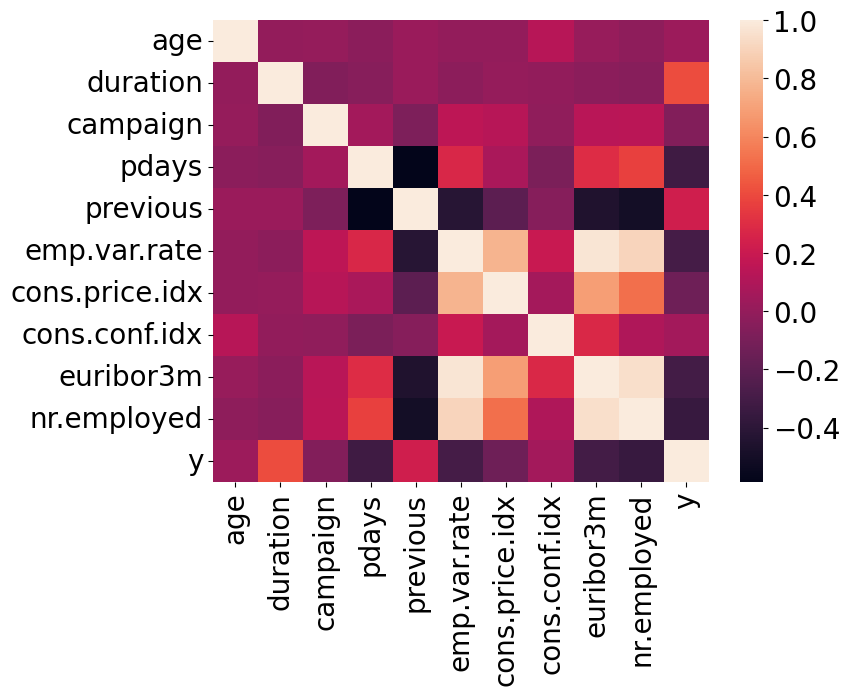

In [141]:
sns.heatmap(correlation_table)

Let's look at the visualized dependences of numerical features from the target feature with scatter plots.


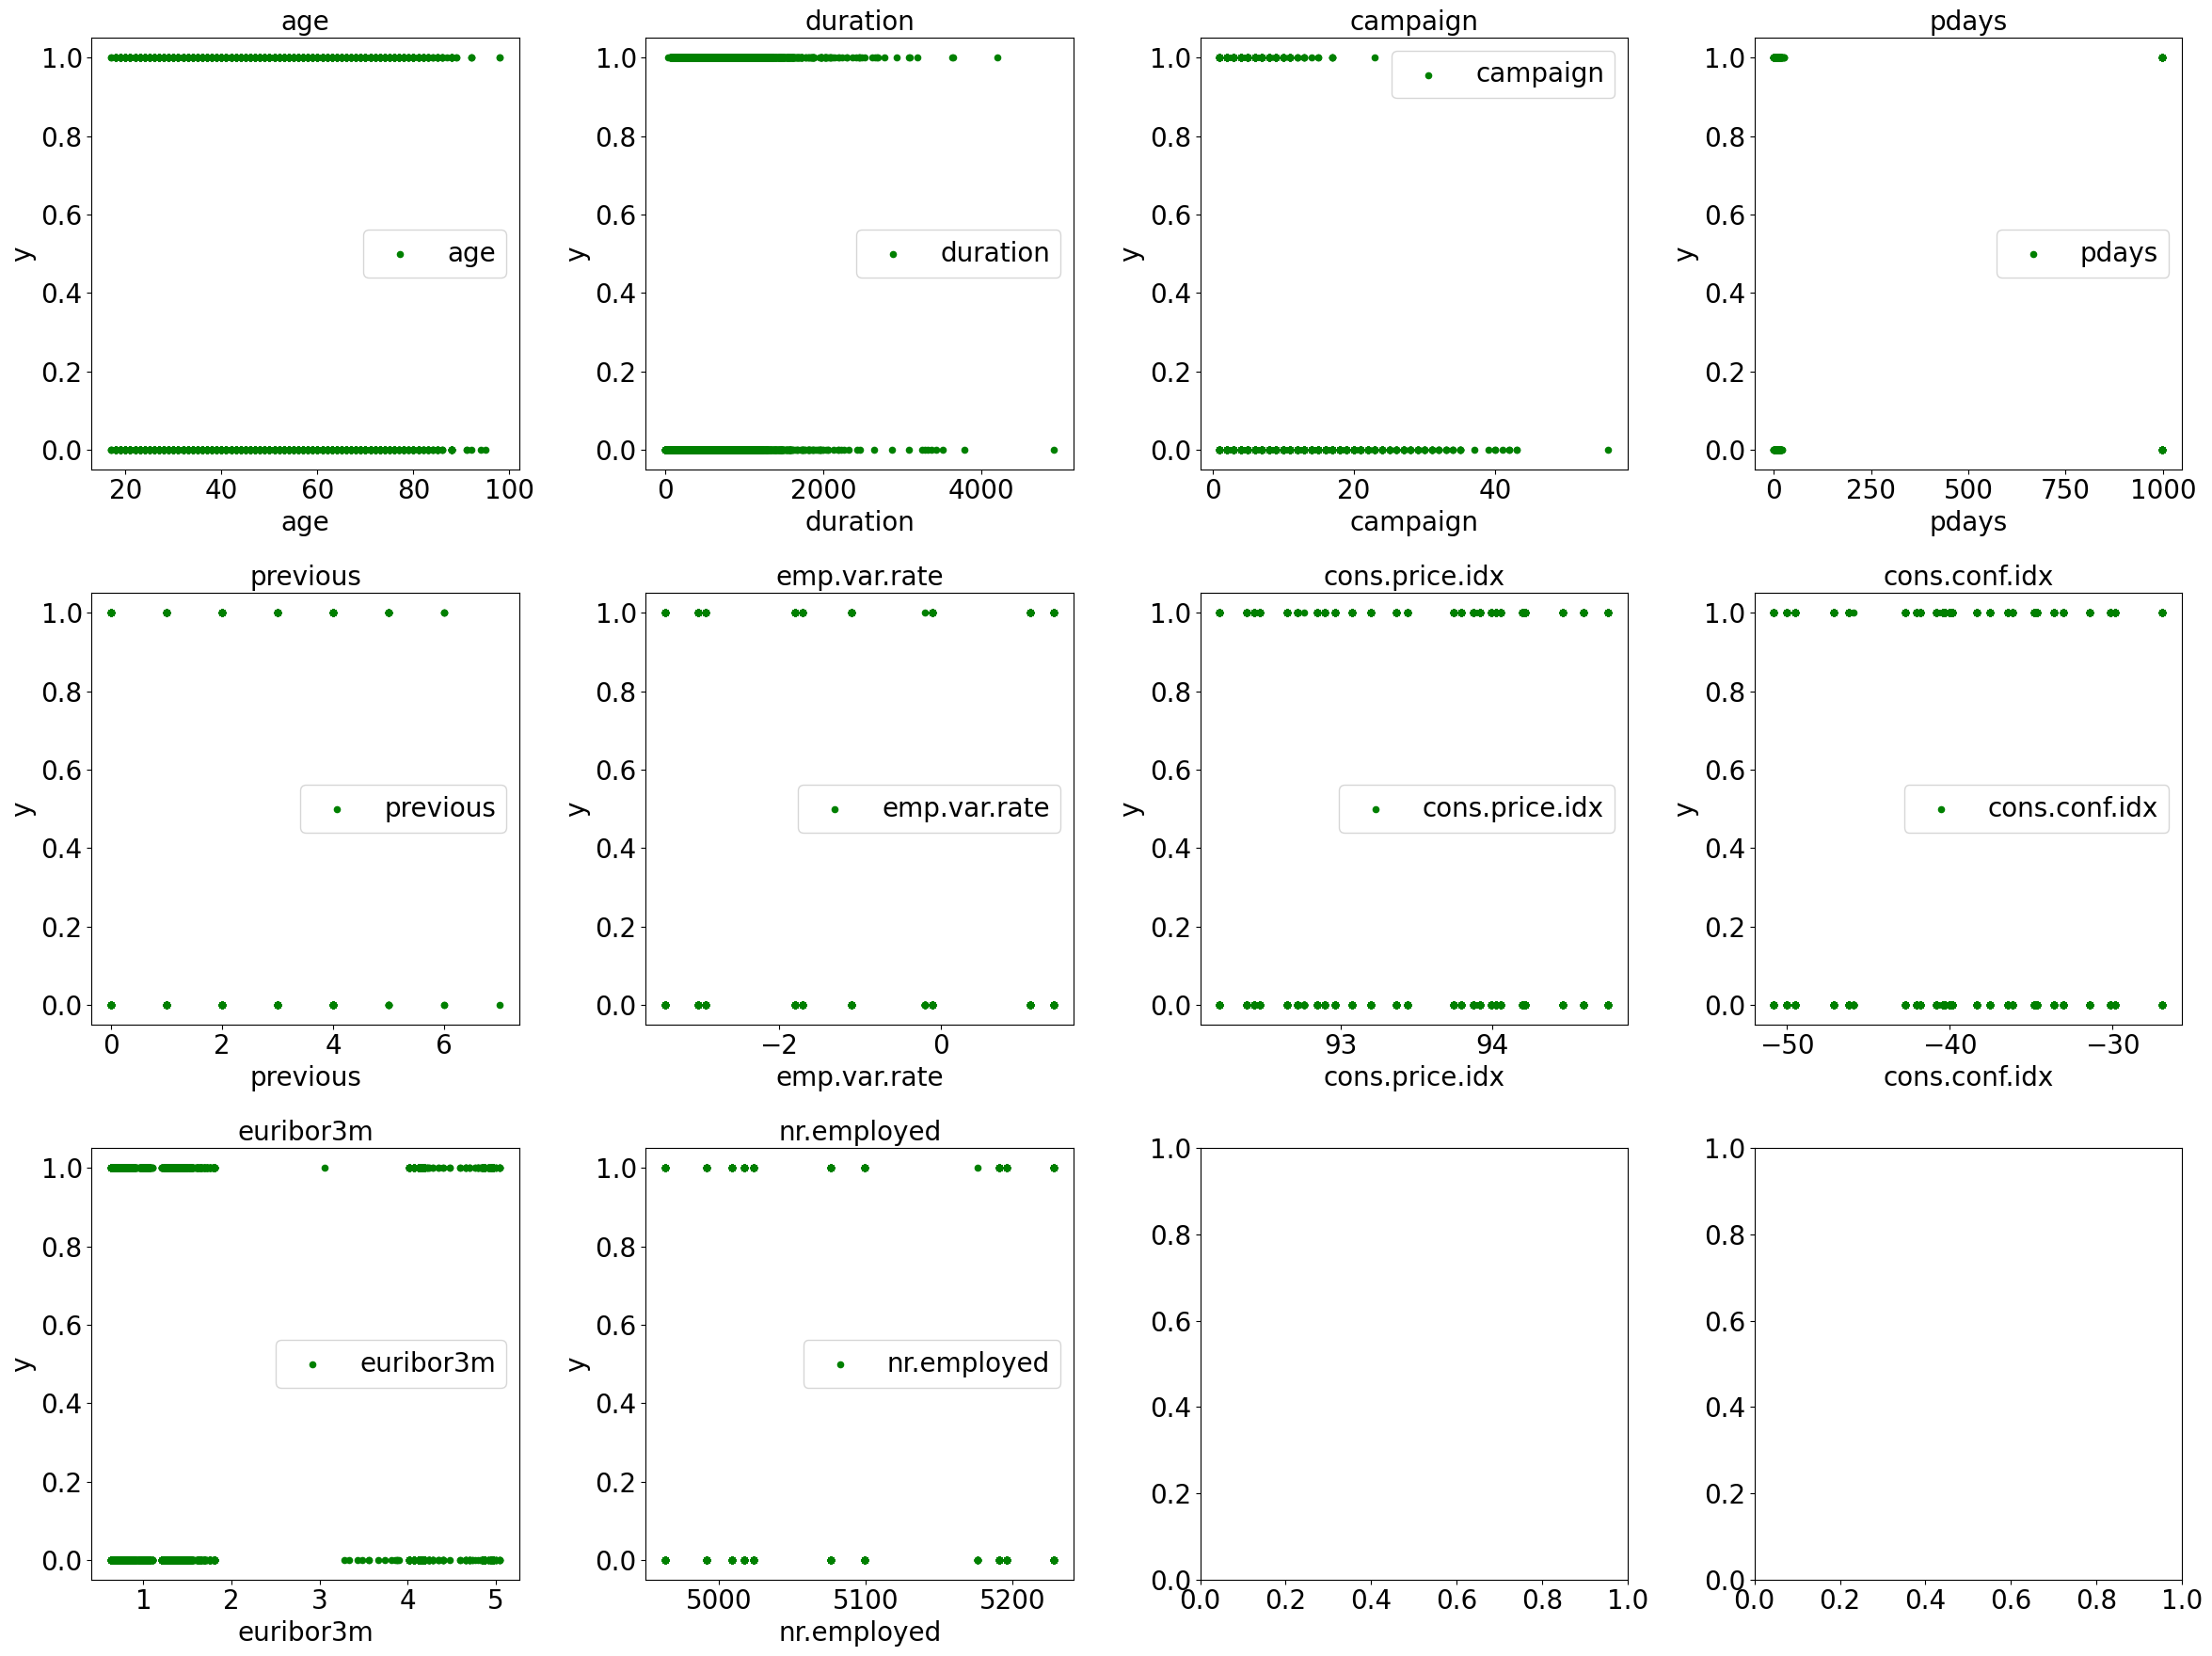

In [142]:
fig, axes = plt.subplots(ncols=4, nrows = 3, figsize=(24, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(numerical)):
    df.plot(x=numerical[i], y = 'y', label=numerical[i], ax=axes[i//4, i%4], kind='scatter', color='green')
    axes[i//4, i%4].set_title(numerical[i])
plt.tight_layout()

As you can see, there are points that can be interpreted as outliers, however, we will not hurry to delete them because they don't seem to be true outliers. These points are too strong so we will leave them. In addition, we will use some models that are resistant to outliers.


We visualize **the distribution of positive target responses** by groups:


Let's compare the age of customers for the top 3 of the most common levels of education using a box plot.


KeyError: 'job'

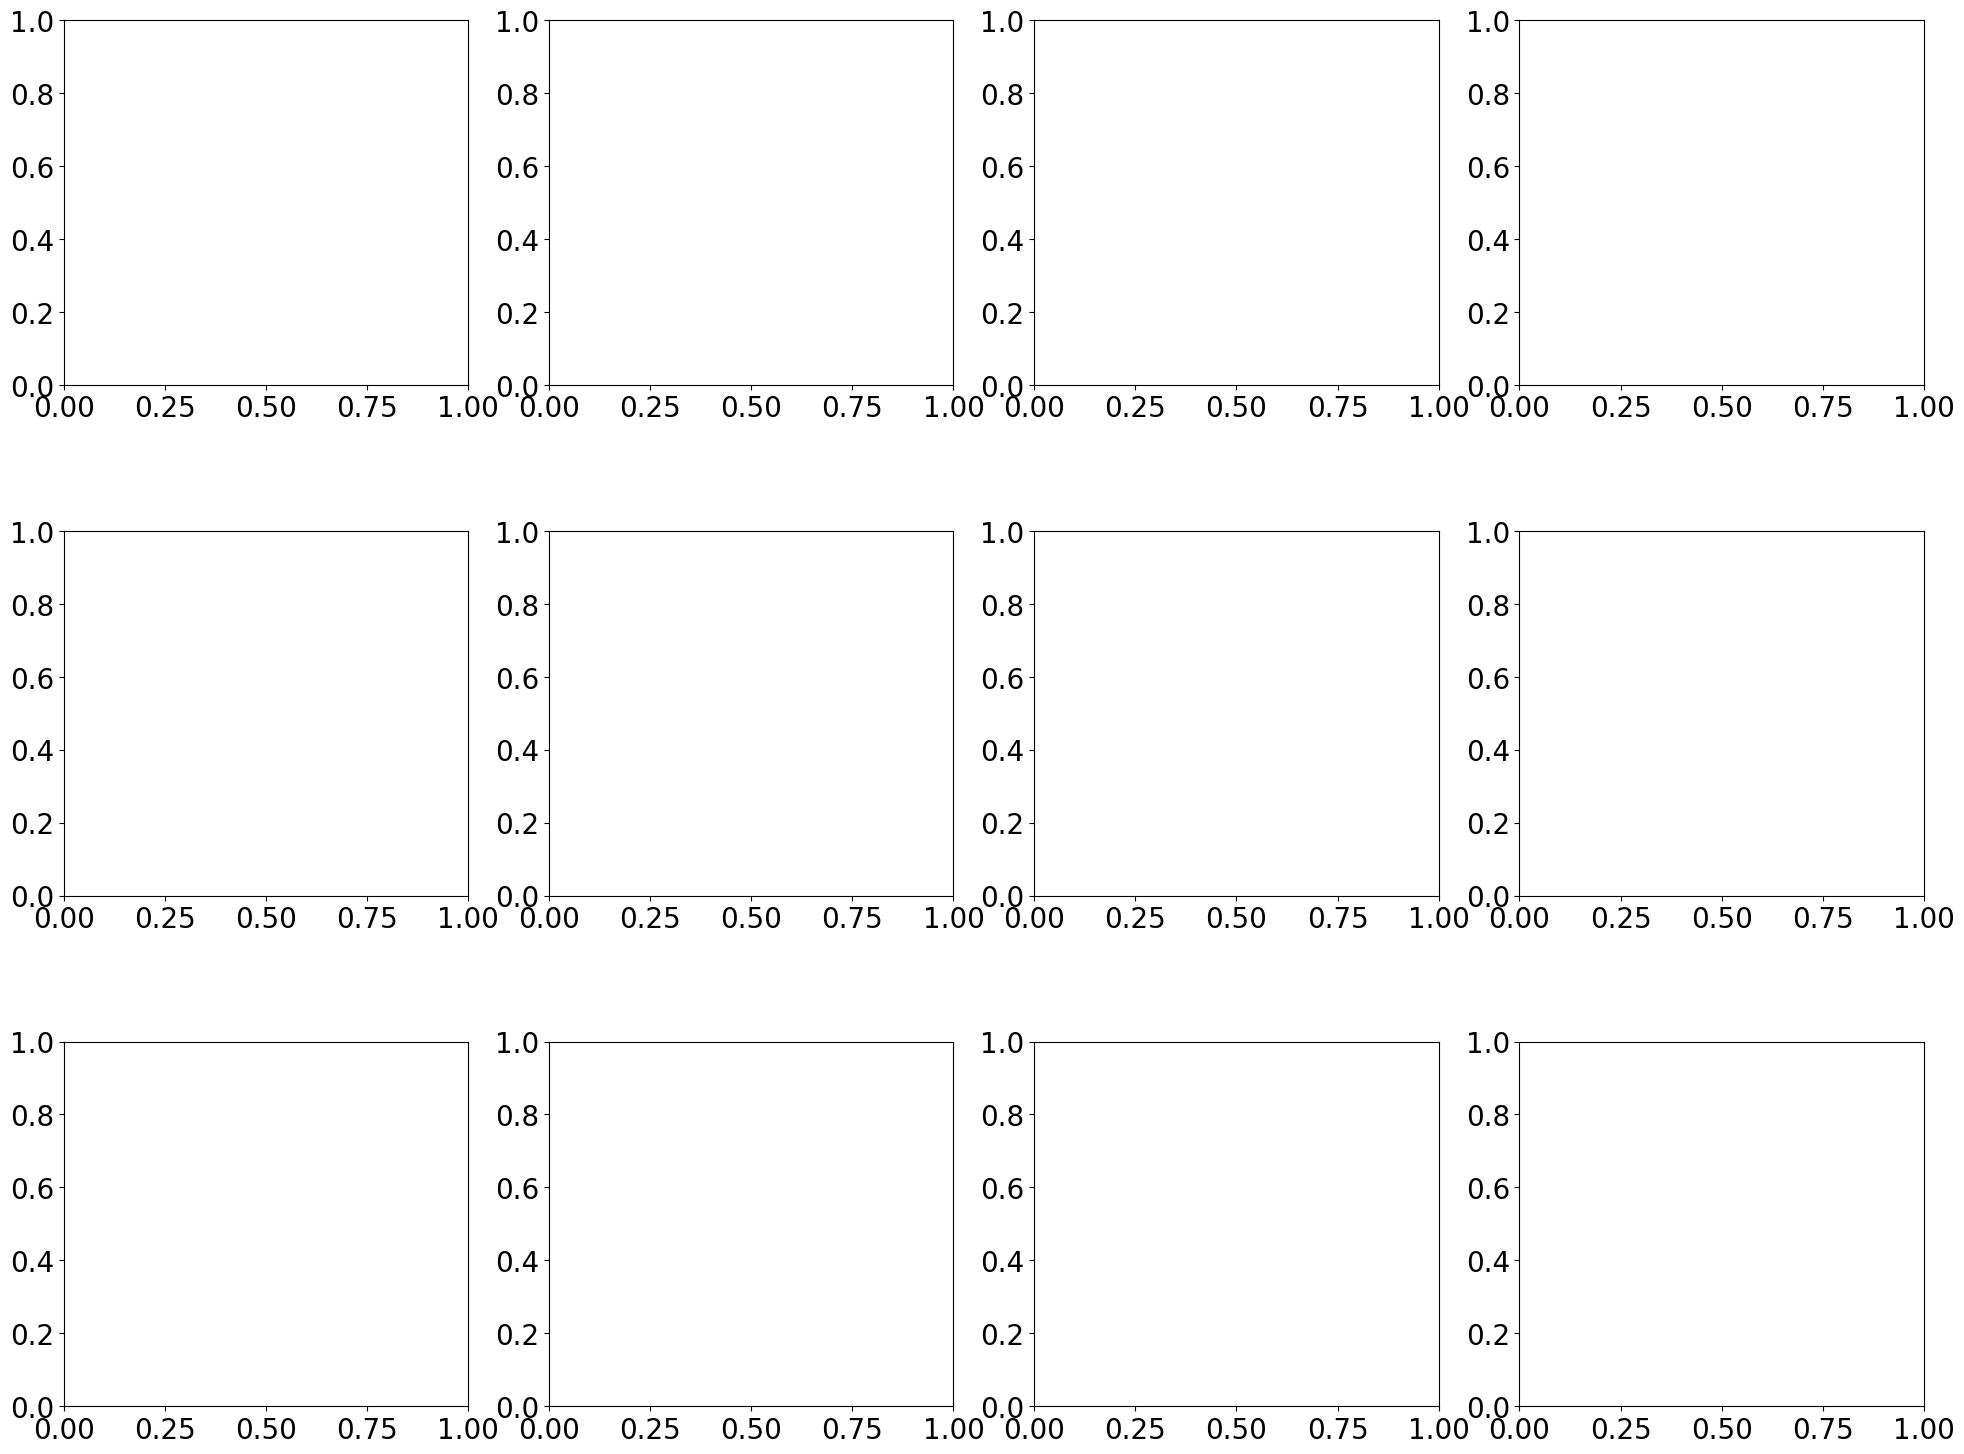

In [150]:
fig, axes = plt.subplots(ncols=4, nrows = 3, figsize=(24, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(categorical)):
    df.groupby(categorical[i])['y'].mean().plot(kind='bar', ax=axes[i//4, i%4], color='green')
    axes[i//4, i%4].set_title(categorical[i])

plt.tight_layout()

In such a form, plots are already more interesting. So we see, for many features, the chance of a positive response is significantly higher.  

We also see that `housing`, `loan` and `day_of_week` features will hardly help us, because judging by the plots, the share of positive target responses hardly depends on them.

There are neither any data missing, nor explicit outliers that should be cut. But we can omit `housing`, `loan` and `day_of_week` features in the next steps. 
   
The `euribor3m` and `nr.employed` features strongly correlate with `emp.var.rate`. Let me remind you that `emp.var.rate` - Employment Variation Rate is a quarterly indicator, `euribor3m` - euribor 3 month rate is a day indicator, and `nr.employed` - number of employees is a quarterly indicator. The correlation of the employment change with the number of employed issues itself is obvious, but its correlation with EURIBOR (Euro Interbank Offered Rate, the European interbank offer rate) is interesting. This indicator is based on the average interbank interest rates in Eurozone. It also has a positive effect since the higher the interest rate is, the more willingly customers will spend their money on financial tools.

Therefore, if banks want to improve their lead generation, what they should do is to improve the quality of phone conversations and run their campaigns when interest rates are high and the macroeconomic environment is stable. 

In [151]:
top_3 = (
    df.education.value_counts().sort_values(ascending=False).head(3).index.values
)
sns.boxplot(
    y="education", x="age", data=df[df.education.isin(top_3)], orient="h"
)

AttributeError: 'DataFrame' object has no attribute 'education'